# Oчистить и визуализировать данные по профессии инженер и должности менеджер

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
works = pd.read_csv("works.csv")
works

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
...,...,...,...,...,...,...,...,...
32678,15000,NaN,NaN,NaN,Женский,2021-06-23,NaN,NaN
32679,13000,Среднее,уборщица,NaN,Женский,2021-07-29,NaN,NaN
32680,16000,Среднее профессиональное,кочегар машинист котельной,NaN,Мужской,2021-11-11,NaN,NaN
32681,35000,Высшее,NaN,NaN,Мужской,2020-04-21,NaN,NaN


In [3]:
# Удалим строки, где 'jobTitle' и 'qualification' равны NaN
works.dropna(subset=['jobTitle'], inplace=True)
works.dropna(subset=['qualification'], inplace=True)

In [4]:
# Осталось 10130 человек
works.shape[0]

10130

## Без рассмотрения случаев, когда  "jobTitle" и "qualification" состоят из нескольких слов

In [5]:
# Приведем значения к нижнему регистру и заменим дефис на пробел
works['qualification'] = works['qualification'].str.replace('-', ' ').str.lower()
works["jobTitle"] = works["jobTitle"].str.replace('-', ' ').str.lower()

In [6]:
# У 9876 человек не совпадает профессия и должность
(works['jobTitle'] == works['qualification']).value_counts()

False    9876
True      254
dtype: int64

## Рассматриваем случаи когда  "jobTitle" и "qualification" состоят из нескольких слов

In [7]:
def coincidences(column1, column2):
    list1 = column1.split()
    for word in list1:
        if word in column2:
            return True
    return False

In [9]:
# У 7714 человек не совпадает профессия и должность
count = 0
for (column1, column2) in zip(works["jobTitle"], works["qualification"]):
    if coincidences(column1, column2) or coincidences(column2, column1):
        count += 1

works.shape[0] - count

7714

## ТОП-5 образований и графики к ним

In [10]:
# Топ-5 образований, после которых люди становятся менеджерами
managers = works[works["jobTitle"].str.contains("менедж")]
managers['qualification'].value_counts().head(5)

бакалавр              98
экономист             86
менеджер              79
юрист                 41
экономист менеджер    38
Name: qualification, dtype: int64

In [11]:
# Топ-5 образований, после которых люди становятся инженерами
engineers = works[works["qualification"].str.contains("инженер")]
engineers['jobTitle'].value_counts().head(5)

инженер            25
главный инженер    23
директор           21
менеджер           13
водитель           11
Name: jobTitle, dtype: int64

In [12]:
managers_list = managers['qualification'].value_counts().head(5)
engineers_list = engineers['jobTitle'].value_counts().head(5)

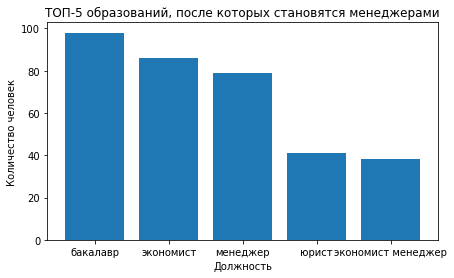

In [13]:
names = managers_list.index.tolist()
values = managers_list.tolist()

fig = plt.figure()
fig.set_figwidth(7)
plt.bar(names, values)
plt.title('ТОП-5 образований, после которых становятся менеджерами') 
plt.xlabel('Должность') 
plt.ylabel('Количество человек') 

plt.show()

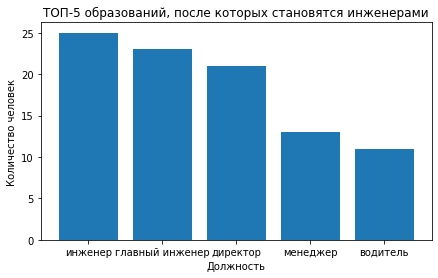

In [14]:
names = engineers_list.index.tolist()
values = engineers_list.tolist()

fig = plt.figure()
fig.set_figwidth(7)
plt.bar(names, values)
plt.title('ТОП-5 образований, после которых становятся инженерами') 
plt.xlabel('Должность') 
plt.ylabel('Количество человек') 

plt.show()